## DIA 006: Clasificación Binaria de Regresion Logistica


La Regresión Logística es un algoritmo de clasificación utilizado para predecir la probabilidad de que una observación pertenezca a una de dos clases posibles (clasificación binaria). A diferencia de la regresión lineal, que predice valores continuos, la regresión logística está diseñada para problemas de clasificación donde el resultado es categórico.

Características clave de la Regresión Logística:

- Función Sigmoide: Transforma la salida lineal del modelo en una probabilidad entre 0 y 1.
 
- Interpretación de Coeficientes: Los coeficientes del modelo indican cómo cada variable independiente afecta la probabilidad de pertenencia a una clase.

- Umbral de Clasificación: Se establece un umbral (comúnmente 0.5) para decidir la clase final basada en la probabilidad predicha.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import joblib

# 1. Cargar el dataset
df = pd.read_csv("titanic.csv")

In [2]:
# 2. Exploración inicial
print("Primeras filas del dataset:")
print(df.head())

print("\nInformación general:")
print(df.info())

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nEstadísticas descriptivas:")
print(df.describe())

Primeras filas del dataset:
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 no

In [3]:
# 3. Selección de características relevantes
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

df_selected = df[features + [target]]

In [4]:
# 4. Manejo de valores nulos
df_selected['Age'].fillna(df_selected['Age'].median(), inplace=True)
df_selected['Embarked'].fillna(df_selected['Embarked'].mode()[0], inplace=True)

print("\nValores nulos después de la imputación:")
print(df_selected.isnull().sum())


Valores nulos después de la imputación:
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26336\3499508621.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_selected['Age'].fillna(df_selected['Age'].median(), inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26336\3499508621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Age'].fillna(df_selected['Age'].med

In [5]:
# 5. Conversión de variables categóricas en numéricas
df_selected['Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})
df_selected = pd.get_dummies(df_selected, columns=['Embarked'], drop_first=True)

print("\nPrimeras filas después del preprocesamiento:")
print(df_selected.head())


Primeras filas después del preprocesamiento:
   Pclass  Sex   Age  SibSp  Parch     Fare  Survived  Embarked_Q  Embarked_S
0       3    0  22.0      1      0   7.2500         0       False        True
1       1    1  38.0      1      0  71.2833         1       False       False
2       3    1  26.0      0      0   7.9250         1       False        True
3       1    1  35.0      1      0  53.1000         1       False        True
4       3    0  35.0      0      0   8.0500         0       False        True


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_26336\3193774142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Sex'] = df_selected['Sex'].map({'male': 0, 'female': 1})


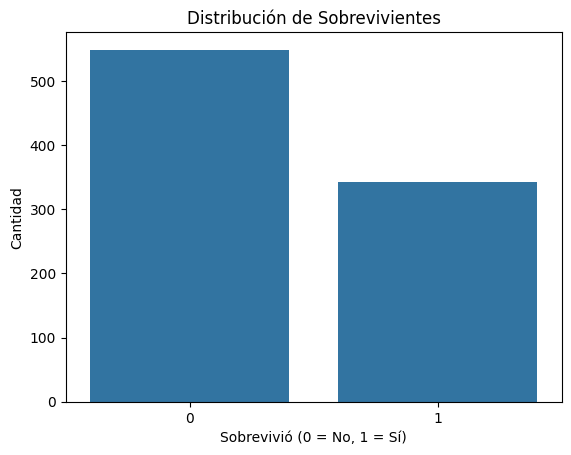

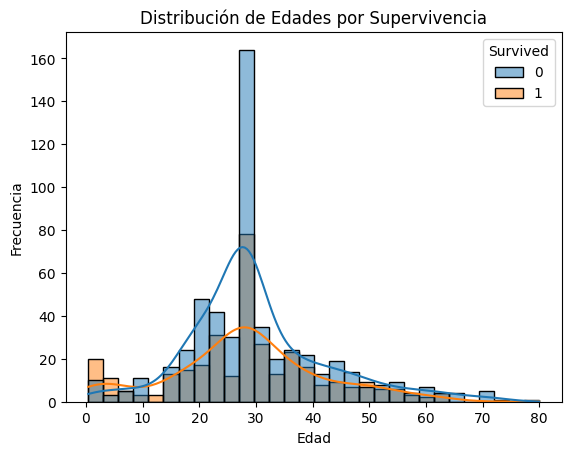

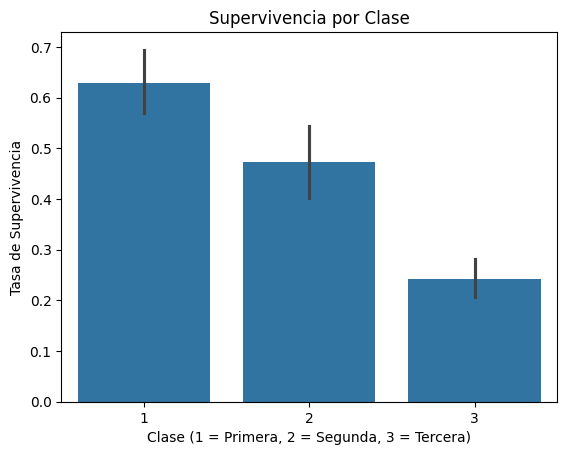

In [6]:
# 6. Visualización de datos
# Distribución de sobrevivientes
sns.countplot(x='Survived', data=df_selected)
plt.title('Distribución de Sobrevivientes')
plt.xlabel('Sobrevivió (0 = No, 1 = Sí)')
plt.ylabel('Cantidad')
plt.show()

# Distribución de edades por supervivencia
sns.histplot(data=df_selected, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Distribución de Edades por Supervivencia')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre clase y supervivencia
sns.barplot(x='Pclass', y='Survived', data=df_selected)
plt.title('Supervivencia por Clase')
plt.xlabel('Clase (1 = Primera, 2 = Segunda, 3 = Tercera)')
plt.ylabel('Tasa de Supervivencia')
plt.show()

In [7]:
# 7. Preparación de los datos para el modelo
X = df_selected.drop('Survived', axis=1)
y = df_selected['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'\nTamaño del conjunto de entrenamiento: {X_train.shape[0]}')
print(f'Tamaño del conjunto de prueba: {X_test.shape[0]}')


Tamaño del conjunto de entrenamiento: 712
Tamaño del conjunto de prueba: 179


In [8]:
# 8. Entrenamiento del modelo de Regresión Logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
# 9. Predicciones
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:,1]


Precisión del modelo: 0.81


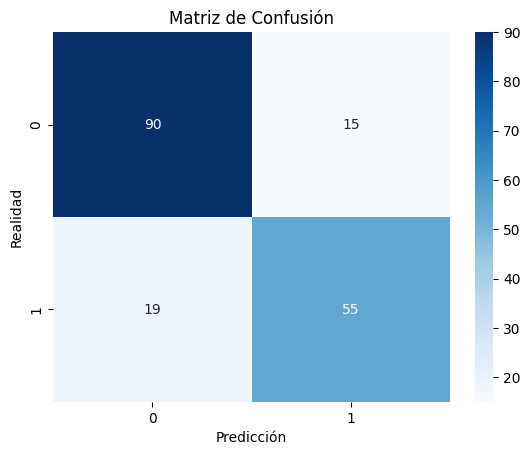


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



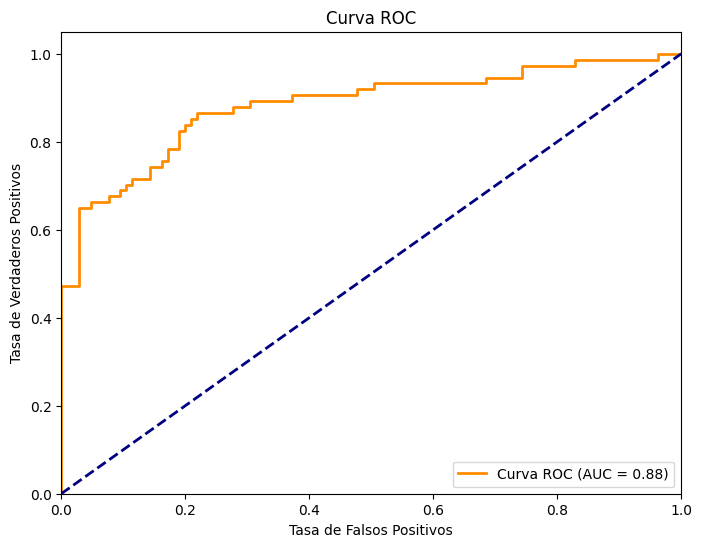

In [11]:
# 10. Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'\nPrecisión del modelo: {accuracy:.2f}')

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Curva ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [12]:
# 11. Interpretar los coeficientes del modelo
coef = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print("\nCoeficientes del modelo:")
print(coef)



Coeficientes del modelo:
      Feature  Coefficient
1         Sex     2.591383
5        Fare     0.002579
2         Age    -0.030574
4       Parch    -0.108161
6  Embarked_Q    -0.112324
3       SibSp    -0.295223
7  Embarked_S    -0.400069
0      Pclass    -0.938010


In [13]:
# 12. Guardar el modelo entrenado
joblib.dump(logreg, 'logistic_regression_titanic.pkl')
print("\nModelo de Regresión Logística guardado como 'logistic_regression_titanic.pkl'")


Modelo de Regresión Logística guardado como 'logistic_regression_titanic.pkl'
